# Noise Cancelling Software
This is a project that aims to cancel external noise for focusing better while using computer.

# Author: Wagner Martins

## Libraries used

In [63]:
import numpy as np
import threading
import time
from pydub import AudioSegment
from pydub.playback import play
from matplotlib import pyplot as plt
from numpy import fft
from scipy.io.wavfile import write, read

## Creating and cancelling a wave mathematically

(0.0, 0.01)

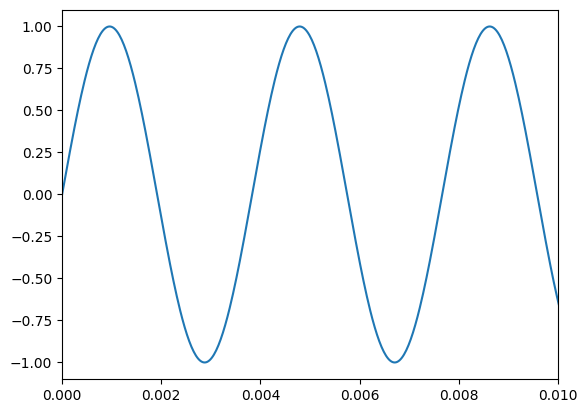

In [53]:
SAMPLE_RATE = 44100

def create_wave(frequency, duration):
    t = np.linspace(0, duration, int(duration*SAMPLE_RATE), endpoint=False)
    wave = np.sin(2 * np.pi * frequency * t)
    return t, wave

t, y = create_wave(261, 10)

plt.plot(t,y)
plt.xlim(0,.01)

In [8]:
wave = (y/y.max()) * 32767
wave1 = np.int16(wave)
wave2 = np.int16(-wave)
write('test.wav', SAMPLE_RATE, wave1)
write('anti-test.wav', SAMPLE_RATE, wave2)

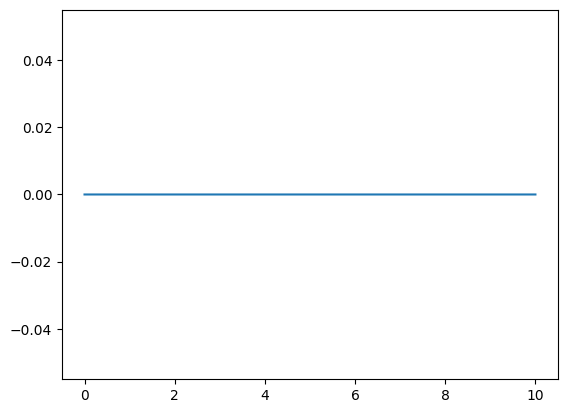

In [10]:
plt.plot(t, wave1+wave2)

## Playing the wave synchronously

In [49]:
audio1 = AudioSegment.from_wav('./test.wav')
audio2 = AudioSegment.from_wav('./anti-test.wav')

t1 = threading.Thread(target=play, args={audio1})
t2 = threading.Thread(target=play, args={audio2})

t1.start()
t2.start()

t1.join()
t2.join()

Input #0, wav, from '/tmp/tmpxijj88ht.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:10.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s
Input #0, wav, from '/tmp/tmpzrtcq98v.wav':
  Duration: 00:00:10.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


## Getting the negative wave from an audio

(0.0, 0.0039)

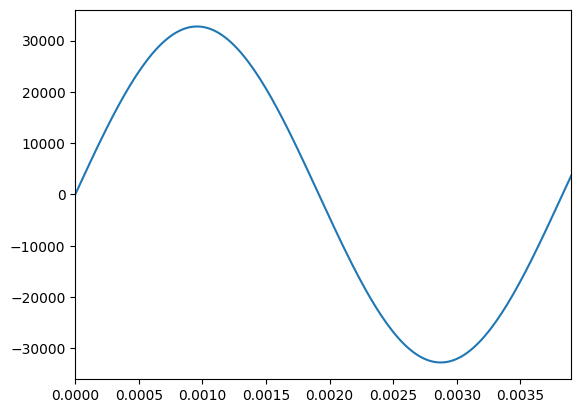

In [76]:
# def create_inv_wave(audio):
_, data = read('./test.wav')
plt.plot(t, data)
plt.xlim(0,0.0039)